In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, RobustScaler, QuantileTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
import time
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [2]:
# Global variables
algorithm_timer = False

In [3]:
cl_data = pd.read_csv('WithOutliers.csv', sep=',')

In [4]:
cl_data.shape

(38448, 44)

In [5]:
cl_data

,num_tokens_title,num_tokens_content,rate_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,avg_token_length,num_keywords,data_channel_is_lifestyle,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_polarity,abs_title_subjectivity,shares,cl_shares
0,12.0,219.0,0.663594,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,...,0.378636,0.100000,0.70,-0.600,-0.200000,0.500000,-0.187500,0.000000,593,0
1,9.0,255.0,0.604743,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,...,0.286915,0.033333,0.70,-0.125,-0.100000,0.000000,0.000000,0.500000,711,0
2,9.0,211.0,0.575130,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,...,0.495833,0.100000,1.00,-0.800,-0.133333,0.000000,0.000000,0.500000,1500,1
3,9.0,531.0,0.503788,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,...,0.385965,0.136364,0.80,-0.600,-0.166667,0.000000,0.000000,0.500000,1200,0
4,13.0,1072.0,0.415646,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,...,0.411127,0.033333,1.00,-0.500,-0.050000,0.454545,0.136364,0.045455,505,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38443,11.0,346.0,0.529052,9.0,7.0,1.0,1.0,4.523121,8.0,0.0,...,0.333791,0.100000,0.75,-0.500,-0.125000,0.100000,0.000000,0.400000,1800,1
38444,12.0,328.0,0.696296,9.0,7.0,3.0,48.0,4.405488,7.0,0.0,...,0.374825,0.136364,0.70,-0.400,-0.100000,0.300000,1.000000,0.200000,1900,1
38445,10.0,442.0,0.516355,24.0,1.0,12.0,1.0,5.076923,8.0,0.0,...,0.307273,0.136364,0.50,-0.800,-0.166667,0.454545,0.136364,0.045455,1900,1
38446,6.0,682.0,0.539493,10.0,1.0,1.0,0.0,4.975073,5.0,0.0,...,0.236851,0.062500,0.50,-0.500,-0.012500,0.000000,0.000000,0.500000,1100,0


# Classification modeling

Classification models:
- Logistic regression
- Ridge regression
- Random forest
- Decision Tree
- K-nearest neighbors
- Stochastic Gradient Boosting
- Multi-layer Perceptron

In [6]:
cl_data.head()

,num_tokens_title,num_tokens_content,rate_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,avg_token_length,num_keywords,data_channel_is_lifestyle,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_polarity,abs_title_subjectivity,shares,cl_shares
0,12.0,219.0,0.663594,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,...,0.378636,0.100000,0.7,-0.600,-0.200000,0.500000,-0.187500,0.000000,593,0
1,9.0,255.0,0.604743,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,...,0.286915,0.033333,0.7,-0.125,-0.100000,0.000000,0.000000,0.500000,711,0
2,9.0,211.0,0.575130,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,...,0.495833,0.100000,1.0,-0.800,-0.133333,0.000000,0.000000,0.500000,1500,1
3,9.0,531.0,0.503788,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,...,0.385965,0.136364,0.8,-0.600,-0.166667,0.000000,0.000000,0.500000,1200,0
4,13.0,1072.0,0.415646,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,...,0.411127,0.033333,1.0,-0.500,-0.050000,0.454545,0.136364,0.045455,505,0


In [7]:
X = cl_data.iloc[:, :42]
X

,num_tokens_title,num_tokens_content,rate_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,avg_token_length,num_keywords,data_channel_is_lifestyle,...,global_rate_negative_words,rate_positive_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_polarity,abs_title_subjectivity
0,12.0,219.0,0.663594,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,...,0.013699,0.769231,0.378636,0.100000,0.70,-0.600,-0.200000,0.500000,-0.187500,0.000000
1,9.0,255.0,0.604743,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,...,0.015686,0.733333,0.286915,0.033333,0.70,-0.125,-0.100000,0.000000,0.000000,0.500000
2,9.0,211.0,0.575130,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,...,0.009479,0.857143,0.495833,0.100000,1.00,-0.800,-0.133333,0.000000,0.000000,0.500000
3,9.0,531.0,0.503788,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,...,0.020716,0.666667,0.385965,0.136364,0.80,-0.600,-0.166667,0.000000,0.000000,0.500000
4,13.0,1072.0,0.415646,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,...,0.012127,0.860215,0.411127,0.033333,1.00,-0.500,-0.050000,0.454545,0.136364,0.045455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38443,11.0,346.0,0.529052,9.0,7.0,1.0,1.0,4.523121,8.0,0.0,...,0.014451,0.722222,0.333791,0.100000,0.75,-0.500,-0.125000,0.100000,0.000000,0.400000
38444,12.0,328.0,0.696296,9.0,7.0,3.0,48.0,4.405488,7.0,0.0,...,0.009146,0.812500,0.374825,0.136364,0.70,-0.400,-0.100000,0.300000,1.000000,0.200000
38445,10.0,442.0,0.516355,24.0,1.0,12.0,1.0,5.076923,8.0,0.0,...,0.024887,0.576923,0.307273,0.136364,0.50,-0.800,-0.166667,0.454545,0.136364,0.045455
38446,6.0,682.0,0.539493,10.0,1.0,1.0,0.0,4.975073,5.0,0.0,...,0.023460,0.466667,0.236851,0.062500,0.50,-0.500,-0.012500,0.000000,0.000000,0.500000


In [8]:
y = cl_data.cl_shares
y

0        0
1        0
2        1
3        0
4        0
        ..
38443    1
38444    1
38445    1
38446    0
38447    0
Name: cl_shares, Length: 38448, dtype: int64

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size = 0.3)

In [10]:
X_train.shape

(26913, 42)

In [11]:
X_test.shape

(11535, 42)

In [12]:
y_train.shape

(26913,)

In [13]:
y_test.shape

(11535,)

## Confusion matrix

In [21]:
def print_conf_matrix(algorithm, y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    cm = np.array([[tp, fp], [fn, tn]])
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm, cmap="Greys", alpha=0.2)
    ax.xaxis.tick_top()
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Popular', 'Unpopular'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Popular', 'Unpopular'))
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax.text(0, 0, cm[0, 0], ha='center', va='center', color='green', fontsize=22)
    ax.text(1, 0, cm[0, 1], ha='center', va='center', color='green', fontsize=22)
    ax.text(0, 1, cm[1, 0], ha='center', va='center', color='green', fontsize=22)
    ax.text(1, 1, cm[1, 1], ha='center', va='center', color='green', fontsize=22)
    plt.title(f"{algorithm} confusion matrix", fontsize=20, fontweight='bold', pad=20)
    plt.savefig(f'conf_{algorithm}.png', dpi=250)
    plt.show()

## Feature importances

In [15]:
def feature_importances(algorithm, column_list, fit_data):
    all_features = fit_data.best_estimator_.feature_importances_
    dict_importance = {}
    for f, item in zip(column_list, all_features):
        dict_importance[f] = item
    # Sort values
    dict_importance = {k: val for k, val in sorted(dict_importance.items(), key=lambda item: item[1], reverse=True)}

    importance_df = pd.DataFrame(dict_importance.items(), columns=['Feature', 'Gini-importance'])
    plt.figure(figsize=(12,8), facecolor='w', edgecolor='k')
    sns.barplot(x="Gini-importance", y="Feature", data=importance_df)
    
    plt.xlabel('Importance', fontsize=14, fontweight='bold')
    plt.ylabel('Features', fontsize=14, fontweight='bold')
    plt.title(f"{algorithm} feature importance", fontsize=18, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.savefig(f'feature_imp_{algorithm}.png', dpi=250)
    plt.show()

## Modeling timer

In [16]:
def check_time(algorithm, estimator):
    if algorithm_timer:
        start_time = time.time()
        fit_estimator = estimator.fit(X_train, y_train)
        fit_estimator.predict(X_test)
        print(f"\nTime for {algorithm} bulding best estimator (in seconds): {(time.time() - start_time)}")

## Logistic regression

### Baseline

In [94]:
log_reg = LogisticRegression(max_iter=300)
score_log_reg = cross_val_score(log_reg, X, y, cv=5)
print("Score mean: ", score_log_reg.mean())

Score mean:  0.5919426380651873


In [95]:
y_pred_log = cross_val_predict(log_reg, X, y, cv=5)
print("Classification report:\n\n", classification_report(y, y_pred_log))

Classification report:

               precision    recall  f1-score   support

           0       0.59      0.68      0.63     19544
           1       0.60      0.50      0.55     18904

    accuracy                           0.59     38448
   macro avg       0.59      0.59      0.59     38448
weighted avg       0.59      0.59      0.59     38448



### Logistic regression with Scalers

In [96]:
# MinMax
log_minmax_pipeline = make_pipeline(MinMaxScaler(), LogisticRegression(max_iter=300))
score_log_minmax = cross_val_score(log_minmax_pipeline, X, y, cv=5)
print("Score mean: ", score_log_minmax.mean())

Score mean:  0.6274986728038181


In [97]:
y_pred_log_minmax = cross_val_predict(log_minmax_pipeline, X, y, cv=5)
print("Classification report:\n\n", classification_report(y, y_pred_log_minmax))

Classification report:

               precision    recall  f1-score   support

           0       0.65      0.59      0.61     19544
           1       0.61      0.67      0.64     18904

    accuracy                           0.63     38448
   macro avg       0.63      0.63      0.63     38448
weighted avg       0.63      0.63      0.63     38448



In [98]:
# RobustScaler
log_robust_pipeline = make_pipeline(RobustScaler(), LogisticRegression(max_iter=300))
score_log_rob = cross_val_score(log_robust_pipeline, X, y, cv=5)
print("Score mean: ", score_log_rob.mean())

Score mean:  0.6204767217653917


In [99]:
y_pred_log_rob = cross_val_predict(log_robust_pipeline, X, y, cv=5)
print("Classification report:\n\n", classification_report(y, y_pred_log_rob))

Classification report:

               precision    recall  f1-score   support

           0       0.64      0.57      0.60     19544
           1       0.60      0.68      0.64     18904

    accuracy                           0.62     38448
   macro avg       0.62      0.62      0.62     38448
weighted avg       0.62      0.62      0.62     38448



In [100]:
# QuantileTransformer
log_reg_qt_pipeline = make_pipeline(QuantileTransformer(), LogisticRegression(max_iter=300))
score_log_qt = cross_val_score(log_reg_qt_pipeline, X, y, cv=5)
print("Score mean: ", score_log_qt.mean())

Score mean:  0.6407110355242092


In [101]:
y_pred_log_qt = cross_val_predict(log_reg_qt_pipeline, X, y, cv=5)
print("Classification report:\n\n", classification_report(y, y_pred_log_qt))

Classification report:

               precision    recall  f1-score   support

           0       0.66      0.61      0.63     19544
           1       0.63      0.67      0.65     18904

    accuracy                           0.64     38448
   macro avg       0.64      0.64      0.64     38448
weighted avg       0.64      0.64      0.64     38448



Best result had QuantileTransformer scaler

### Logistic regression with GridSearchCV

In [18]:
log_grid_pipeline = Pipeline([( "scaler", QuantileTransformer(random_state=0)), ("logreg", LogisticRegression(random_state=0))])
parameters = {
    'scaler__n_quantiles': [400],
    'logreg__penalty': ['l2'],
    'logreg__C': [10, 1],
    'logreg__solver': ['saga'],
    'logreg__class_weight': ['balanced', None]
    'logreg__max_iter': [300],
    'logreg__multi_class': ['auto']
}
log_grid = GridSearchCV(log_grid_pipeline, parameters, cv=5, n_jobs=-1)
log_grid_fit = log_grid.fit(X_train,y_train)

Best score:  0.6577117924887472
Best params:  {'logreg__C': 10, 'logreg__class_weight': 'balanced', 'logreg__max_iter': 300, 'logreg__multi_class': 'auto', 'logreg__penalty': 'l2', 'logreg__solver': 'saga', 'scaler__n_quantiles': 400}

Classification report:

               precision    recall  f1-score   support

           0       0.67      0.67      0.67      5864
           1       0.66      0.65      0.66      5671

    accuracy                           0.66     11535
   macro avg       0.66      0.66      0.66     11535
weighted avg       0.66      0.66      0.66     11535



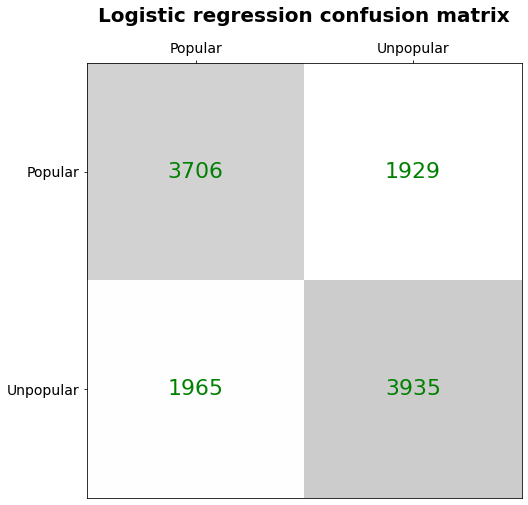

In [22]:
print("Best score: ", log_grid.best_score_)
print("Best params: ", log_grid.best_params_)
log_est = log_grid_fit.best_estimator_
# Test set
log_grid_pred = log_est.predict(X_test)
print("\nClassification report:\n\n", classification_report(y_test, log_grid_pred))
print_conf_matrix("Logistic regression", y_test, log_grid_pred)

In [23]:
# Train set
log_grid_pred = log_est.predict(X_train)
print("\nClassification report:\n\n", classification_report(y_train, log_grid_pred))


Classification report:

               precision    recall  f1-score   support

           0       0.66      0.67      0.67     13680
           1       0.66      0.65      0.65     13233

    accuracy                           0.66     26913
   macro avg       0.66      0.66      0.66     26913
weighted avg       0.66      0.66      0.66     26913



In [105]:
check_time("Logistic Regression", log_est)

## Ridge Regression

### Baseline

In [106]:
ridge_reg = RidgeClassifier()
score_ridge_reg = cross_val_score(ridge_reg, X, y, cv=5)
print("Score mean: ", score_ridge_reg.mean())

Score mean:  0.6291112106684417


In [107]:
y_pred_ridge = cross_val_predict(ridge_reg, X, y, cv=5)
print("Classification report:\n\n", classification_report(y, y_pred_ridge))

Classification report:

               precision    recall  f1-score   support

           0       0.65      0.60      0.62     19544
           1       0.61      0.66      0.64     18904

    accuracy                           0.63     38448
   macro avg       0.63      0.63      0.63     38448
weighted avg       0.63      0.63      0.63     38448



### Ridge regression with scalers

In [108]:
# QuantileTransformer
ridge_reg_qt_pipeline = make_pipeline(QuantileTransformer(), RidgeClassifier())
score_ridge_qt = cross_val_score(ridge_reg_qt_pipeline, X, y, cv=5)
print("Score mean: ", score_ridge_qt.mean())

Score mean:  0.642427526801414


In [109]:
y_pred_ridge_qt = cross_val_predict(ridge_reg_qt_pipeline, X, y, cv=5)
print("Classification report:\n\n", classification_report(y, y_pred_ridge_qt))

Classification report:

               precision    recall  f1-score   support

           0       0.66      0.62      0.64     19544
           1       0.63      0.66      0.65     18904

    accuracy                           0.64     38448
   macro avg       0.64      0.64      0.64     38448
weighted avg       0.64      0.64      0.64     38448



## Ridge Regression with GridSearchCV

In [24]:
ridge_grid_pipeline = Pipeline([( "scaler", QuantileTransformer(random_state=0)), ("ridge", RidgeClassifier())])
parameters = {
    'scaler__n_quantiles': [500],
    'ridge__alpha': [0.1, 1.0],
    'ridge__max_iter': [None],
    'ridge__class_weight': [None, 'balanced'], 
    'ridge__solver': ['sparse_cg', 'cholesky', 'auto', 'svd']
}
ridge_grid = GridSearchCV(ridge_grid_pipeline, parameters, cv=5, n_jobs=-1)
ridge_grid_fit = ridge_grid.fit(X_train,y_train)

Best score:  0.6566342297444236
Best params:  {'ridge__alpha': 0.1, 'ridge__class_weight': None, 'ridge__max_iter': None, 'ridge__solver': 'sparse_cg', 'scaler__n_quantiles': 500}

Classification report:

               precision    recall  f1-score   support

           0       0.66      0.69      0.67      5864
           1       0.66      0.64      0.65      5671

    accuracy                           0.66     11535
   macro avg       0.66      0.66      0.66     11535
weighted avg       0.66      0.66      0.66     11535



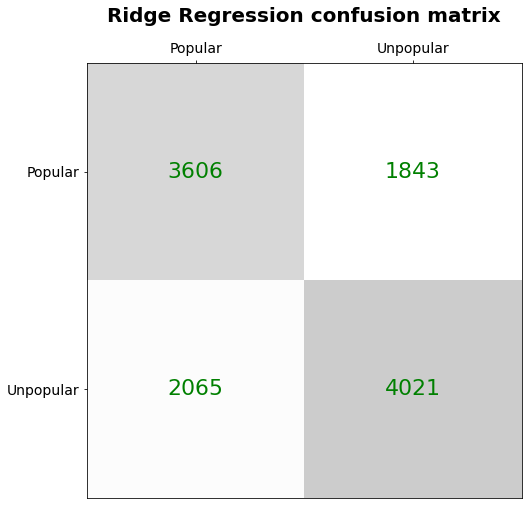

In [25]:
print("Best score: ", ridge_grid.best_score_)
print("Best params: ", ridge_grid.best_params_)
ridge_est = ridge_grid_fit.best_estimator_
# Test set
ridge_grid_pred = ridge_est.predict(X_test)
print("\nClassification report:\n\n", classification_report(y_test, ridge_grid_pred))
print_conf_matrix("Ridge Regression", y_test, ridge_grid_pred)

In [27]:
# Train set
ridge_grid_pred = ridge_est.predict(X_train)
print("\nClassification report:\n\n", classification_report(y_train, ridge_grid_pred))


Classification report:

               precision    recall  f1-score   support

           0       0.66      0.69      0.67     13680
           1       0.66      0.63      0.64     13233

    accuracy                           0.66     26913
   macro avg       0.66      0.66      0.66     26913
weighted avg       0.66      0.66      0.66     26913



In [126]:
check_time("Logistic Regression", ridge_est)

## Random Forest

### Baseline

In [36]:
rand_for = cross_val_score(RandomForestClassifier(random_state=0), X, y, cv=5)
print("Score mean: ", rand_for.mean())

Score mean:  0.6432079536723547


In [37]:
y_pred_rand_for = cross_val_predict(RandomForestClassifier(random_state=0), X, y, cv=5)
print("Classification report:\n\n", classification_report(y, y_pred_rand_for))

Classification report:

               precision    recall  f1-score   support

           0       0.66      0.62      0.64     19544
           1       0.63      0.67      0.65     18904

    accuracy                           0.64     38448
   macro avg       0.64      0.64      0.64     38448
weighted avg       0.64      0.64      0.64     38448



### Random Forest with HalvingGridSearchCV

In [28]:
model_rd = RandomForestClassifier(random_state=0)
param_grid = {
    'n_estimators': [400],
    'criterion': ['entropy'],
    'max_depth': [None, 200],
    'max_features': ['log2'],
    'bootstrap': [True],
    'class_weight': [None],
    'min_samples_leaf': [8, 1], 
    'min_samples_split': [20, 2] 
}
rd_grid = HalvingGridSearchCV(model_rd, param_grid, cv=3, factor=5, refit=True, n_jobs=-1)
rd_grid_fit = rd_grid.fit(X_train, y_train)

Best score:  0.6626165793482705
Best params:  {'bootstrap': True, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 400}

Classification report:

               precision    recall  f1-score   support

           0       0.67      0.68      0.68      5864
           1       0.67      0.65      0.66      5671

    accuracy                           0.67     11535
   macro avg       0.67      0.67      0.67     11535
weighted avg       0.67      0.67      0.67     11535



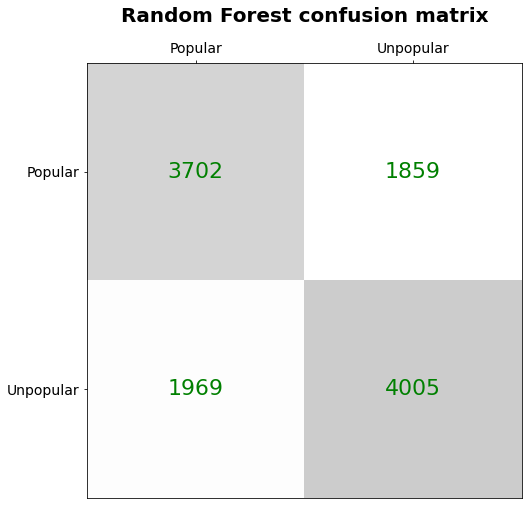

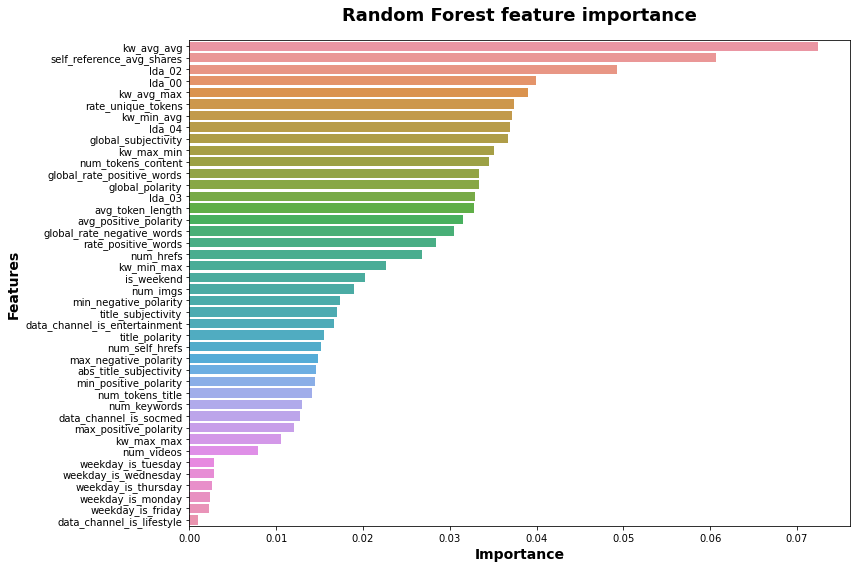

In [29]:
print("Best score: ", rd_grid.best_score_)
print("Best params: ", rd_grid.best_params_)
rd_est = rd_grid_fit.best_estimator_
# Test set
rd_grid_pred = rd_est.predict(X_test)
print("\nClassification report:\n\n", classification_report(y_test, rd_grid_pred))
print_conf_matrix("Random Forest", y_test, rd_grid_pred)
feature_importances("Random Forest", X.columns, rd_grid_fit)

In [31]:
# Train set
rd_grid_pred = rd_est.predict(X_train)
print("\nClassification report:\n\n", classification_report(y_train, rd_grid_pred))


Classification report:

               precision    recall  f1-score   support

           0       0.89      0.90      0.89     13680
           1       0.90      0.88      0.89     13233

    accuracy                           0.89     26913
   macro avg       0.89      0.89      0.89     26913
weighted avg       0.89      0.89      0.89     26913



In [151]:
check_time("Random Forest", rd_est)

## Decision Tree

### Baseline

In [152]:
d_tree = cross_val_score(DecisionTreeClassifier(random_state=0), X, y, cv=5)
print("Score mean: ", d_tree.mean())

Score mean:  0.5598220314058843


In [153]:
y_pred_d_tree = cross_val_predict(DecisionTreeClassifier(random_state=0), X, y, cv=5)
print("Classification report:\n\n", classification_report(y, y_pred_d_tree))

Classification report:

               precision    recall  f1-score   support

           0       0.57      0.55      0.56     19544
           1       0.55      0.57      0.56     18904

    accuracy                           0.56     38448
   macro avg       0.56      0.56      0.56     38448
weighted avg       0.56      0.56      0.56     38448



### Decision Tree with GridSearchCV

In [32]:
model_dtree = DecisionTreeClassifier(random_state=0)
parameters = {
    'criterion': ['gini', 'entropy'], 
    'splitter': ['random', 'best'], 
    'min_samples_leaf': [12, 1, 8], 
    'max_depth': [100, 300],
    'max_features': ["auto"],
    'class_weight': [None, 'balanced'],
    'min_samples_split': [25, 2],
    'min_weight_fraction_leaf': [0.0]
}
dtree_grid = GridSearchCV(model_dtree, parameters, cv=5, n_jobs=-1)
dtree_grid_fit = dtree_grid.fit(X_train, y_train)

Best score:  0.6101138830261915
Best params:  {'class_weight': None, 'criterion': 'gini', 'max_depth': 100, 'max_features': 'auto', 'min_samples_leaf': 12, 'min_samples_split': 25, 'min_weight_fraction_leaf': 0.0, 'splitter': 'random'}

Classification report:

               precision    recall  f1-score   support

           0       0.62      0.64      0.63      5864
           1       0.62      0.60      0.61      5671

    accuracy                           0.62     11535
   macro avg       0.62      0.62      0.62     11535
weighted avg       0.62      0.62      0.62     11535



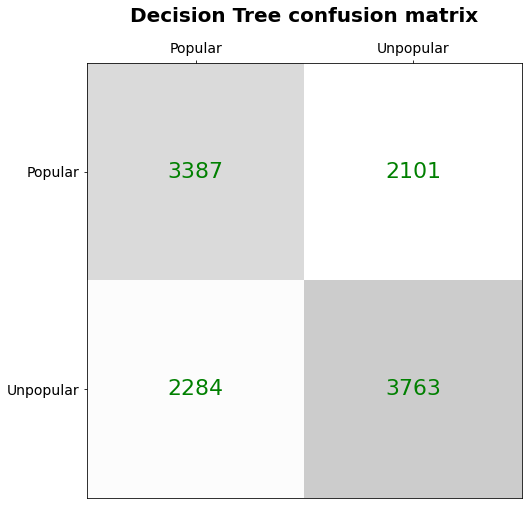

In [33]:
print("Best score: ", dtree_grid.best_score_)
print("Best params: ", dtree_grid.best_params_)
dtree_est = dtree_grid_fit.best_estimator_
# Test set
dtree_grid_pred = dtree_est.predict(X_test)
print("\nClassification report:\n\n", classification_report(y_test, dtree_grid_pred))
print_conf_matrix("Decision Tree", y_test, dtree_grid_pred)

In [35]:
# Train set
dt_grid_pred = dtree_est.predict(X_train)
print("\nClassification report:\n\n", classification_report(y_train, dt_grid_pred))


Classification report:

               precision    recall  f1-score   support

           0       0.67      0.69      0.68     13680
           1       0.67      0.65      0.66     13233

    accuracy                           0.67     26913
   macro avg       0.67      0.67      0.67     26913
weighted avg       0.67      0.67      0.67     26913



In [210]:
check_time("Decision Tree", dtree_est)

## K-nearest neighbors

### Baseline

In [215]:
knn_qt_pipeline = make_pipeline(QuantileTransformer(), KNeighborsClassifier())
score_knn_qt = cross_val_score(knn_qt_pipeline, X, y, cv=5)
print("Score mean: ", score_knn_qt.mean())

Score mean:  0.5987835661402023


In [216]:
y_pred_knn = cross_val_predict(knn_qt_pipeline, X, y, cv=5)
print("Classification report:\n\n", classification_report(y, y_pred_knn))

Classification report:

               precision    recall  f1-score   support

           0       0.60      0.61      0.61     19544
           1       0.59      0.58      0.59     18904

    accuracy                           0.60     38448
   macro avg       0.60      0.60      0.60     38448
weighted avg       0.60      0.60      0.60     38448



### K-nearest neighbors with GridSearchCV

In [36]:
knn_grid_pipeline = Pipeline([("scaler", QuantileTransformer(random_state=0)), ("knn", KNeighborsClassifier())])
parameters = {
    'scaler__n_quantiles': [500],
    'knn__n_neighbors': [15],
    'knn__metric': ['minkowski'],
    'knn__weights': ['uniform'],
    'knn__algorithm': ['auto'],
    'knn__leaf_size': [20, 30],
    'knn__p': [1, 2]
}
knn_grid = GridSearchCV(knn_grid_pipeline, parameters, cv=5, n_jobs=-1)
knn_grid_fit = knn_grid.fit(X_train, y_train)

Best score:  0.6276143988814311
Best params:  {'knn__algorithm': 'auto', 'knn__leaf_size': 20, 'knn__metric': 'minkowski', 'knn__n_neighbors': 15, 'knn__p': 1, 'knn__weights': 'uniform', 'scaler__n_quantiles': 500}

Classification report:

               precision    recall  f1-score   support

           0       0.63      0.68      0.65      5864
           1       0.64      0.58      0.61      5671

    accuracy                           0.63     11535
   macro avg       0.63      0.63      0.63     11535
weighted avg       0.63      0.63      0.63     11535



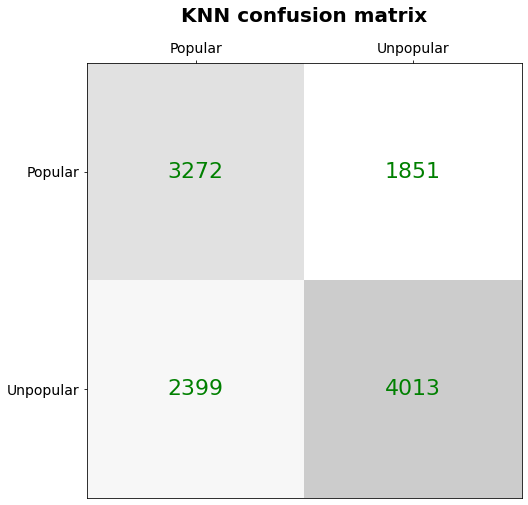

In [37]:
print("Best score: ", knn_grid.best_score_)
print("Best params: ", knn_grid.best_params_)
knn_est = knn_grid_fit.best_estimator_
# Test set
knn_grid_pred = knn_est.predict(X_test)
print("\nClassification report:\n\n", classification_report(y_test, knn_grid_pred))
print_conf_matrix("KNN", y_test, knn_grid_pred)

In [38]:
# Train set
knn_grid_pred = knn_est.predict(X_train)
print("\nClassification report:\n\n", classification_report(y_train, knn_grid_pred))


Classification report:

               precision    recall  f1-score   support

           0       0.68      0.74      0.71     13680
           1       0.71      0.63      0.67     13233

    accuracy                           0.69     26913
   macro avg       0.69      0.69      0.69     26913
weighted avg       0.69      0.69      0.69     26913



In [218]:
check_time("KNN", knn_est)

## Stochastic Gradient Boosting

### Baseline

In [14]:
grad_b = cross_val_score(GradientBoostingClassifier(), X, y, cv=5)
print("Score mean: ", grad_b.mean())

Score mean:  0.6427661964865959


In [15]:
y_pred_grad = cross_val_predict(GradientBoostingClassifier(), X, y, cv=5)
print("Classification report:\n\n", classification_report(y, y_pred_grad))

Classification report:

               precision    recall  f1-score   support

           0       0.66      0.63      0.64     19544
           1       0.63      0.66      0.64     18904

    accuracy                           0.64     38448
   macro avg       0.64      0.64      0.64     38448
weighted avg       0.64      0.64      0.64     38448



### Stochastic Gradient Boosting with HalvingGridSearchCV

In [39]:
model_grad = GradientBoostingClassifier()
param_grid = {
    'loss': ['deviance'],
    'n_estimators': [80, 110, 300],
    'subsample': [0.8],
    'criterion': ['friedman_mse'],
    'min_samples_split': [30, 20], 
    'min_samples_leaf': [15, 8], 
    'max_depth': [5, 8],
    'max_features': ['log2'],
    'learning_rate': [0.1, 0.05]
}
grad_grid = HalvingGridSearchCV(model_grad, param_grid, cv=3, factor=5, refit=True, n_jobs=-1)
grad_grid_fit = grad_grid.fit(X_train, y_train)

Best score:  0.6644744175677181
Best params:  {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 15, 'min_samples_split': 30, 'n_estimators': 80, 'subsample': 0.8}

Classification report:

               precision    recall  f1-score   support

           0       0.67      0.68      0.68      5864
           1       0.67      0.65      0.66      5671

    accuracy                           0.67     11535
   macro avg       0.67      0.67      0.67     11535
weighted avg       0.67      0.67      0.67     11535



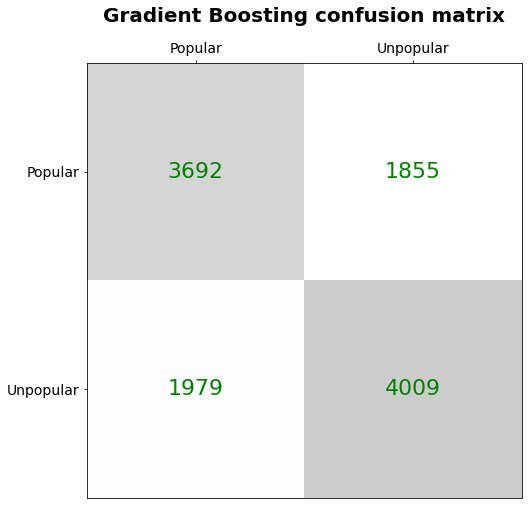

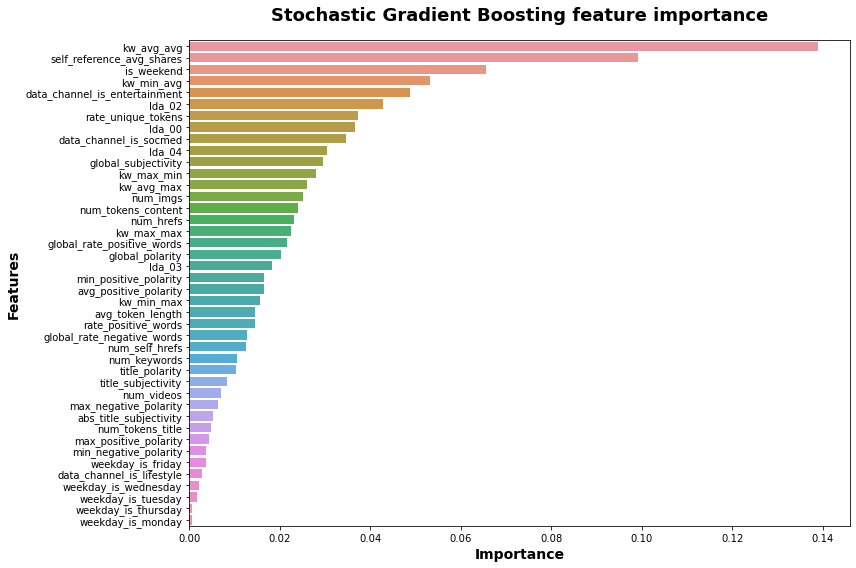

In [40]:
print("Best score: ", grad_grid.best_score_)
print("Best params: ", grad_grid.best_params_)
grad_est = grad_grid_fit.best_estimator_
# Test set
grad_grid_pred = grad_est.predict(X_test)
print("\nClassification report:\n\n", classification_report(y_test, grad_grid_pred))
print_conf_matrix("Gradient Boosting", y_test, grad_grid_pred)
feature_importances("Stochastic Gradient Boosting", X.columns, grad_grid_fit)

In [41]:
# Train set
grad_grid_pred = grad_est.predict(X_train)
print("\nClassification report:\n\n", classification_report(y_train, grad_grid_pred))


Classification report:

               precision    recall  f1-score   support

           0       0.71      0.72      0.71     13680
           1       0.71      0.69      0.70     13233

    accuracy                           0.71     26913
   macro avg       0.71      0.71      0.71     26913
weighted avg       0.71      0.71      0.71     26913



In [ ]:
check_time("Stochastic Gradient Boosting", grad_est)

## Multi-layer Perceptron

### Baseline

In [33]:
mlp_qt_pipeline = make_pipeline(QuantileTransformer(), MLPClassifier())
score_mlp_qt = cross_val_score(mlp_qt_pipeline, X, y, cv=5)
print("Score mean: ", score_mlp_qt.mean())

C:\Users\Alex\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Score mean:  0.6207099801939541


C:\Users\Alex\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [34]:
y_pred_mlp_qt = cross_val_predict(mlp_qt_pipeline, X, y, cv=5)
print("Classification report:\n\n", classification_report(y, y_pred_mlp_qt))

C:\Users\Alex\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification report:

               precision    recall  f1-score   support

           0       0.64      0.59      0.61     19544
           1       0.61      0.65      0.63     18904

    accuracy                           0.62     38448
   macro avg       0.62      0.62      0.62     38448
weighted avg       0.62      0.62      0.62     38448



C:\Users\Alex\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Multi-layer Perceptron with GridSearchCV

In [42]:
mlp_grid_pipeline = Pipeline([("scaler", QuantileTransformer(random_state=0)), ("mlp", MLPClassifier(random_state=0))])
parameters = {
    'scaler__n_quantiles': [300],
    'mlp__hidden_layer_sizes': [(40, )], # (50, 50, 50)
    'mlp__activation': ['tanh', 'relu'],
    'mlp__max_iter': [100],
    'mlp__alpha': [0.05, 0.0001]
}
mlp_grid = GridSearchCV(mlp_grid_pipeline, parameters, cv=3, n_jobs=-1)
mlp_grid_fit = mlp_grid.fit(X_train, y_train)

C:\Users\Alex\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Best score:  0.6603128599561551
Best params:  {'mlp__activation': 'tanh', 'mlp__alpha': 0.05, 'mlp__hidden_layer_sizes': (40,), 'mlp__max_iter': 100, 'scaler__n_quantiles': 300}

Classification report:

               precision    recall  f1-score   support

           0       0.66      0.71      0.68      5864
           1       0.67      0.62      0.64      5671

    accuracy                           0.66     11535
   macro avg       0.66      0.66      0.66     11535
weighted avg       0.66      0.66      0.66     11535



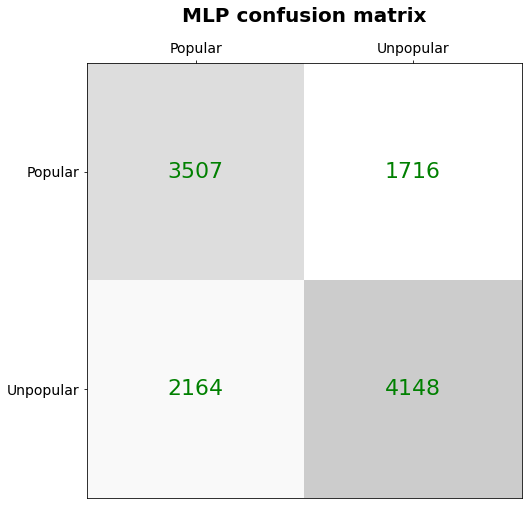

In [43]:
# print(mlp_grid_pipeline.cv_results_)
print("Best score: ", mlp_grid.best_score_)
print("Best params: ", mlp_grid.best_params_)
mlp_est = mlp_grid_fit.best_estimator_
mlp_grid_pred = mlp_est.predict(X_test)
print("\nClassification report:\n\n", classification_report(y_test, mlp_grid_pred))
print_conf_matrix("MLP", y_test, mlp_grid_pred)

In [44]:
# Train set
mlp_grid_pred = mlp_est.predict(X_train)
print("\nClassification report:\n\n", classification_report(y_train, mlp_grid_pred))


Classification report:

               precision    recall  f1-score   support

           0       0.66      0.71      0.69     13680
           1       0.68      0.63      0.65     13233

    accuracy                           0.67     26913
   macro avg       0.67      0.67      0.67     26913
weighted avg       0.67      0.67      0.67     26913



In [229]:
check_time("MLP", mlp_est)

## ROC Curve

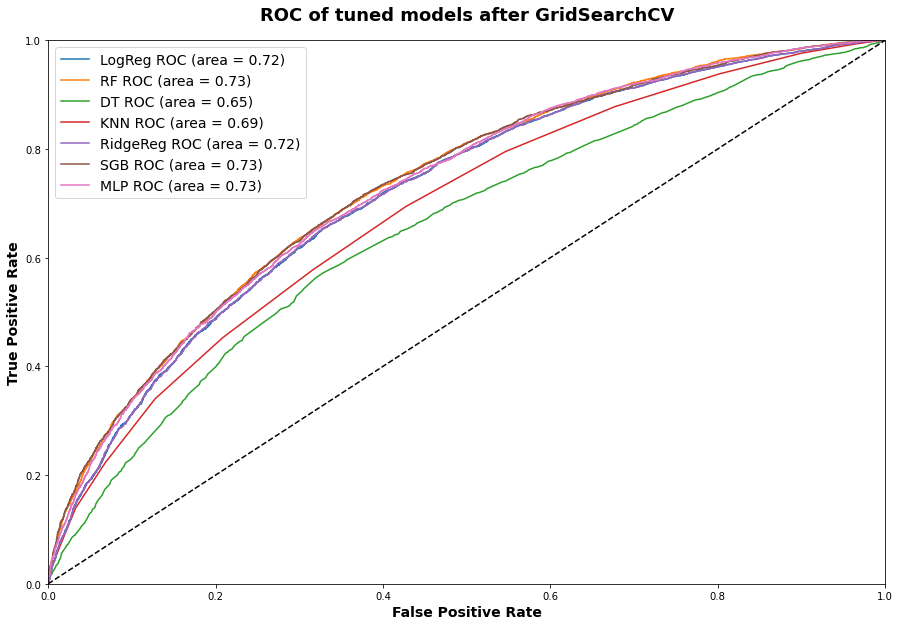

In [45]:
plt.figure(figsize=(15, 10))

# Logistic Regression
probs = log_est.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('LogReg',roc_auc))

# Random Forest
probs = rd_est.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('RF',roc_auc))

# Decision tree
probs = dtree_est.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('DT',roc_auc))

# K-nearest neighbors
probs = knn_est.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('KNN',roc_auc))

# Ridge
preds = ridge_est.decision_function(X_test)
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('RidgeReg',roc_auc))

# Stochastic Gradient Boosting
probs = grad_est.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('SGB',roc_auc))

# Multi-layer Perceptron
probs = mlp_est.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('MLP',roc_auc))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
plt.legend(loc=0, fontsize=14)
plt.title('ROC of tuned models after GridSearchCV', fontsize=18, fontweight='bold', pad=20)
plt.savefig('roc_classif.png', dpi=250)
plt.show()